In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

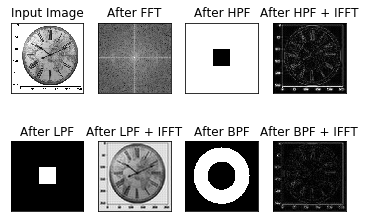

In [5]:
real_img = cv2.imread('clock.png', 0)                 # read image
real_img = np.float32(real_img)                       # convert image to float
row, col = real_img.shape                             # retrieve number of rows and columns
c_row, c_col = int(row / 2), int(col / 2)             # determine center of rows and columns
r_max = 100                                           # user defined values for the band (range constants)
r_min = 50

# Fourier Transform
f_array = np.fft.fft2(real_img)                       # 2D fast Fourier transform to get frequency transform
f_shift = np.fft.fftshift(f_array)                    # move zero frequency to the center of the spectrum
fft = np.log10(abs(f_shift))                          # compute logarithm of the absolute value of the complex number

# Apply High Pass Filter
hpf_mask = np.ones((row, col), np.uint8)              # change all rows and columns to 1
hpf_mask[c_row-30:c_row+30, c_col-30:c_col+30] = 0    # creating square mask and set 0 for the area

# Apply Low Pass Filter
lpf_mask = np.zeros((row, col), np.uint8)             # converts all the rows and columns to 0
lpf_mask[c_row-30:c_row+30, c_col-30:c_col+30] = 1    # creating square mask and set 1 for the area

# Band pass filter
bpf_mask = np.zeros((row, col), np.uint8)             # change all rows and columns to 0
x, y = np.ogrid[:row, :col]                           # returns mesh grid
mask_area = np.logical_and(((x - c_row) ** 2 + (y - c_col) ** 2 >= r_min ** 2),     # creating concentric circle mask x^2 + y^2 = r^2
                           ((x - c_row) ** 2 + (y - c_col) ** 2 <= r_max ** 2))
bpf_mask[mask_area] = 1                               # set 1 for only the points that are in the mask area


# Inverse Fourier Transform on BPF
def inverse_fft(mask):
    mask_f_shift = f_shift * mask                      # apply mask with frequency transform
    fi_shift = np.fft.ifftshift(mask_f_shift)          # move zero frequency to the top left corner
    i_fft = np.fft.ifft2(fi_shift)                     # 2D Inverse fast Fourier transform
    i_fft = np.abs(i_fft)                              # get the absolute value of the complex number
    return i_fft


hpf_inverse = inverse_fft(hpf_mask)
lpf_inverse = inverse_fft(lpf_mask)
bpf_inverse = inverse_fft(bpf_mask)

# Visualization of all images
plt.subplot(2, 4, 1), plt.imshow(real_img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 2), plt.imshow(fft, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 3), plt.imshow(hpf_mask, cmap='gray')
plt.title('After HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 4), plt.imshow(hpf_inverse, cmap='gray')
plt.title('After HPF + IFFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 5), plt.imshow(lpf_mask, cmap='gray')
plt.title('After LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 6), plt.imshow(lpf_inverse, cmap='gray')
plt.title('After LPF + IFFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 7), plt.imshow(bpf_mask, cmap='gray')
plt.title('After BPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 8), plt.imshow(bpf_inverse, cmap='gray')
plt.title('After BPF + IFFT'), plt.xticks([]), plt.yticks([])
plt.show()